# 1.5 Supervised Learning Algorithms Part 2

### This Script Contains the Following Points:
#### 1. Importing Libraries & Data
#### 2. Decision Tree

### 1. Importing Libraries & Data

In [45]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

In [46]:
# Creating folder path to project folder
path = r'/Users/C SaiVishwanath/Desktop/ClimateWins'

In [47]:
# Importing weather prediction dataset as 'climate'
climate = pd.read_csv(os.path.join(path, '01 Data/Original Data/weather_prediction.csv'))
climate

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [48]:
# Importing pleasant weather dataset as 'pleasantweather'
pleasantweather = pd.read_csv(os.path.join(path, '01 Data/Original Data/Pleasant_Weather.csv'))
pleasantweather

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 2. Decision Tree

In [50]:
# Reducing to just the temperature variables 
df = climate[['DATE', 'MONTH','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',        
 'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
 'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
 'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
 'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
 'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
 'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
 'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
 'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
 'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
 'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
 'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
 'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
 'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()

In [51]:
# Creating   X matrix by dropping the unneeded columns.
X = df.drop(['DATE', 'MONTH'], axis=1)
y = pleasantweather.drop(['DATE'], axis=1)

In [52]:
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [53]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


In [55]:
# Correcting above error
# Defining 'plot_tree'
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

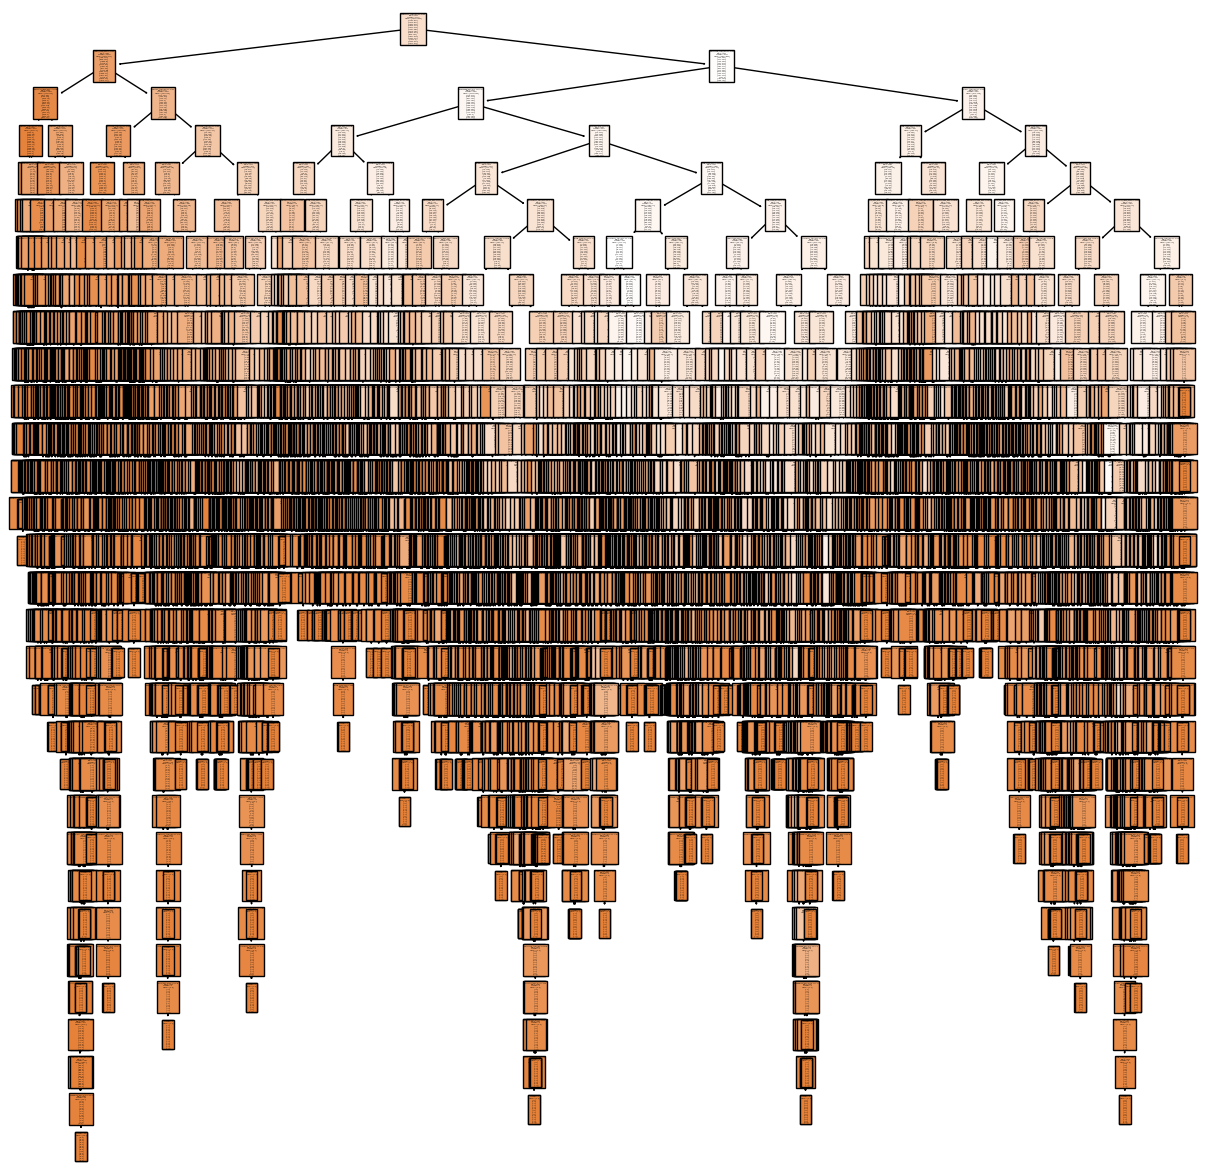

In [58]:
# Fit the Decision Tree classifier
weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
weather_dt.fit(X_train, y_train)

# Ensure `y_train` is a Series for `.unique()`
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.iloc[:, 0]  # Extract the first column if it's a DataFrame

# Plot the decision tree
plt.figure(figsize=(15, 15))
plot_tree(
    weather_dt, 
    feature_names=X_train.columns,  # Use DataFrame columns for feature names
    class_names=y_train.unique(),  # Ensure `.unique()` is used on a Series
    filled=True
)
plt.show()

In [60]:
# Finding the training accuracy score using the cross validation method
y_pred_train = weather_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(weather_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.8621890006510746


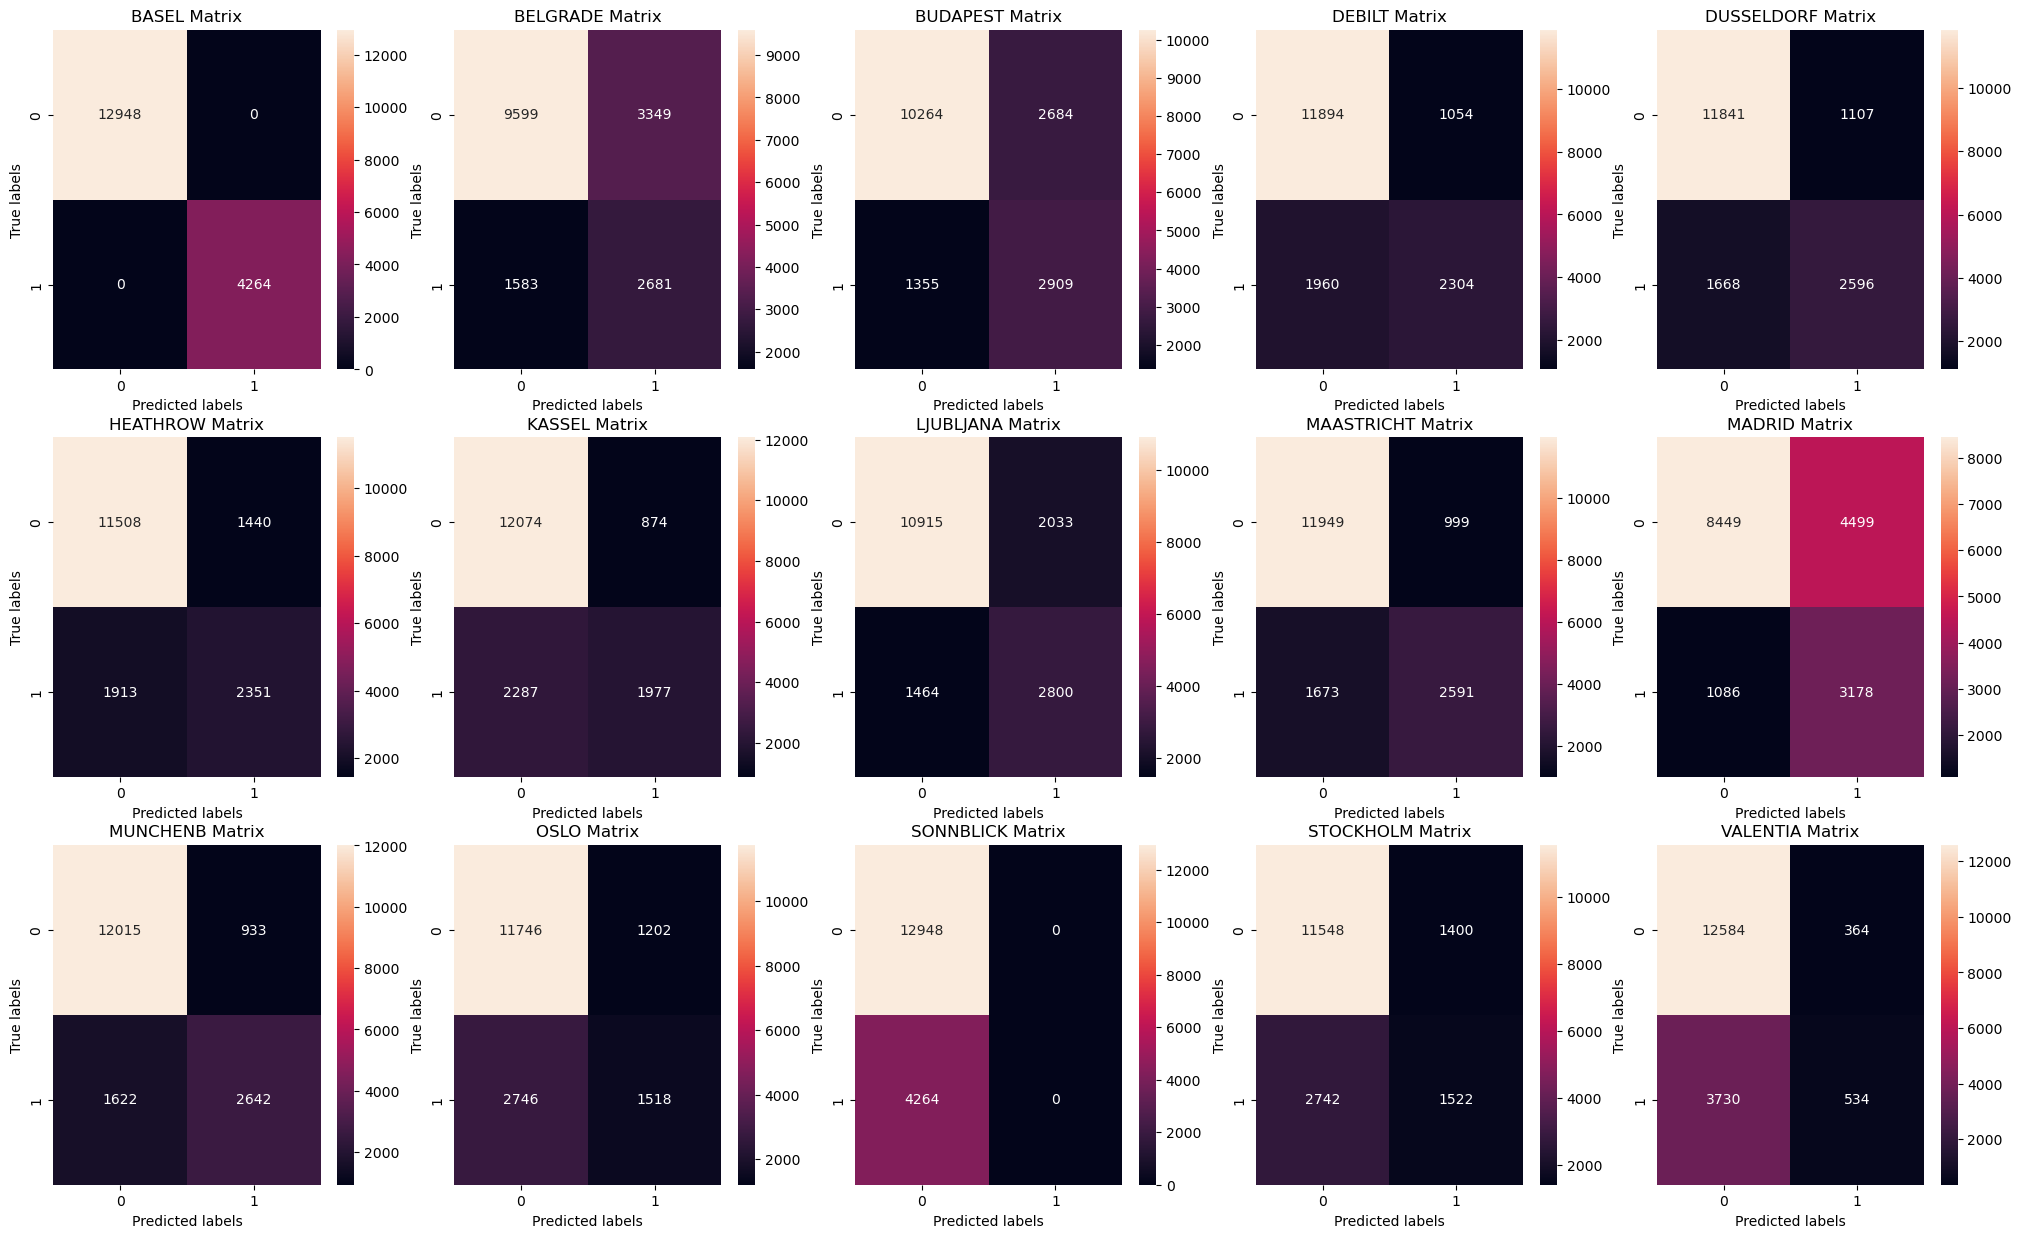

In [66]:
# Creating confusion matrix based on the last "k" in the sequence (Training data)
# Ensure key variables are properly structured
assert isinstance(y_train, (pd.DataFrame, pd.Series)), "y_train should be a DataFrame or Series"
assert len(locations) <= 15, "More locations than subplots available"

figure, ax = plt.subplots(3, 5, figsize=(25, 15))
count = 0

for i in range(3):
    for j in range(5):
        if count >= len(locations):  # Ensure we don't go out of bounds
            break
        
        name = locations[count]
        # Check y_train structure and use appropriate indexing
        if isinstance(y_train, pd.DataFrame):
            cm = confusion_matrix(y_train[name + key], y_pred_train[:, count])
        else:  # If y_train is a Series
            cm = confusion_matrix(y_train, y_pred_train[:, count])
        
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])
        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(name + ' Matrix')
        
        count += 1

In [68]:
y_test_pred = weather_dt.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_test_pred))
multilabel_confusion_matrix(y_test, y_test_pred)

Test accuracy score:  0.47420704078075987


array([[[3862,  476],
        [ 466,  934]],

       [[3179,  597],
        [ 521, 1441]],

       [[3387,  513],
        [ 483, 1355]],

       [[4296,  341],
        [ 360,  741]],

       [[4116,  391],
        [ 396,  835]],

       [[4078,  492],
        [ 425,  743]],

       [[4485,  330],
        [ 329,  594]],

       [[3672,  523],
        [ 477, 1066]],

       [[4158,  404],
        [ 372,  804]],

       [[2824,  344],
        [ 407, 2163]],

       [[4161,  385],
        [ 379,  813]],

       [[4547,  332],
        [ 323,  536]],

       [[5738,    0],
        [   0,    0]],

       [[4418,  348],
        [ 385,  587]],

       [[5309,  153],
        [ 177,   99]]])

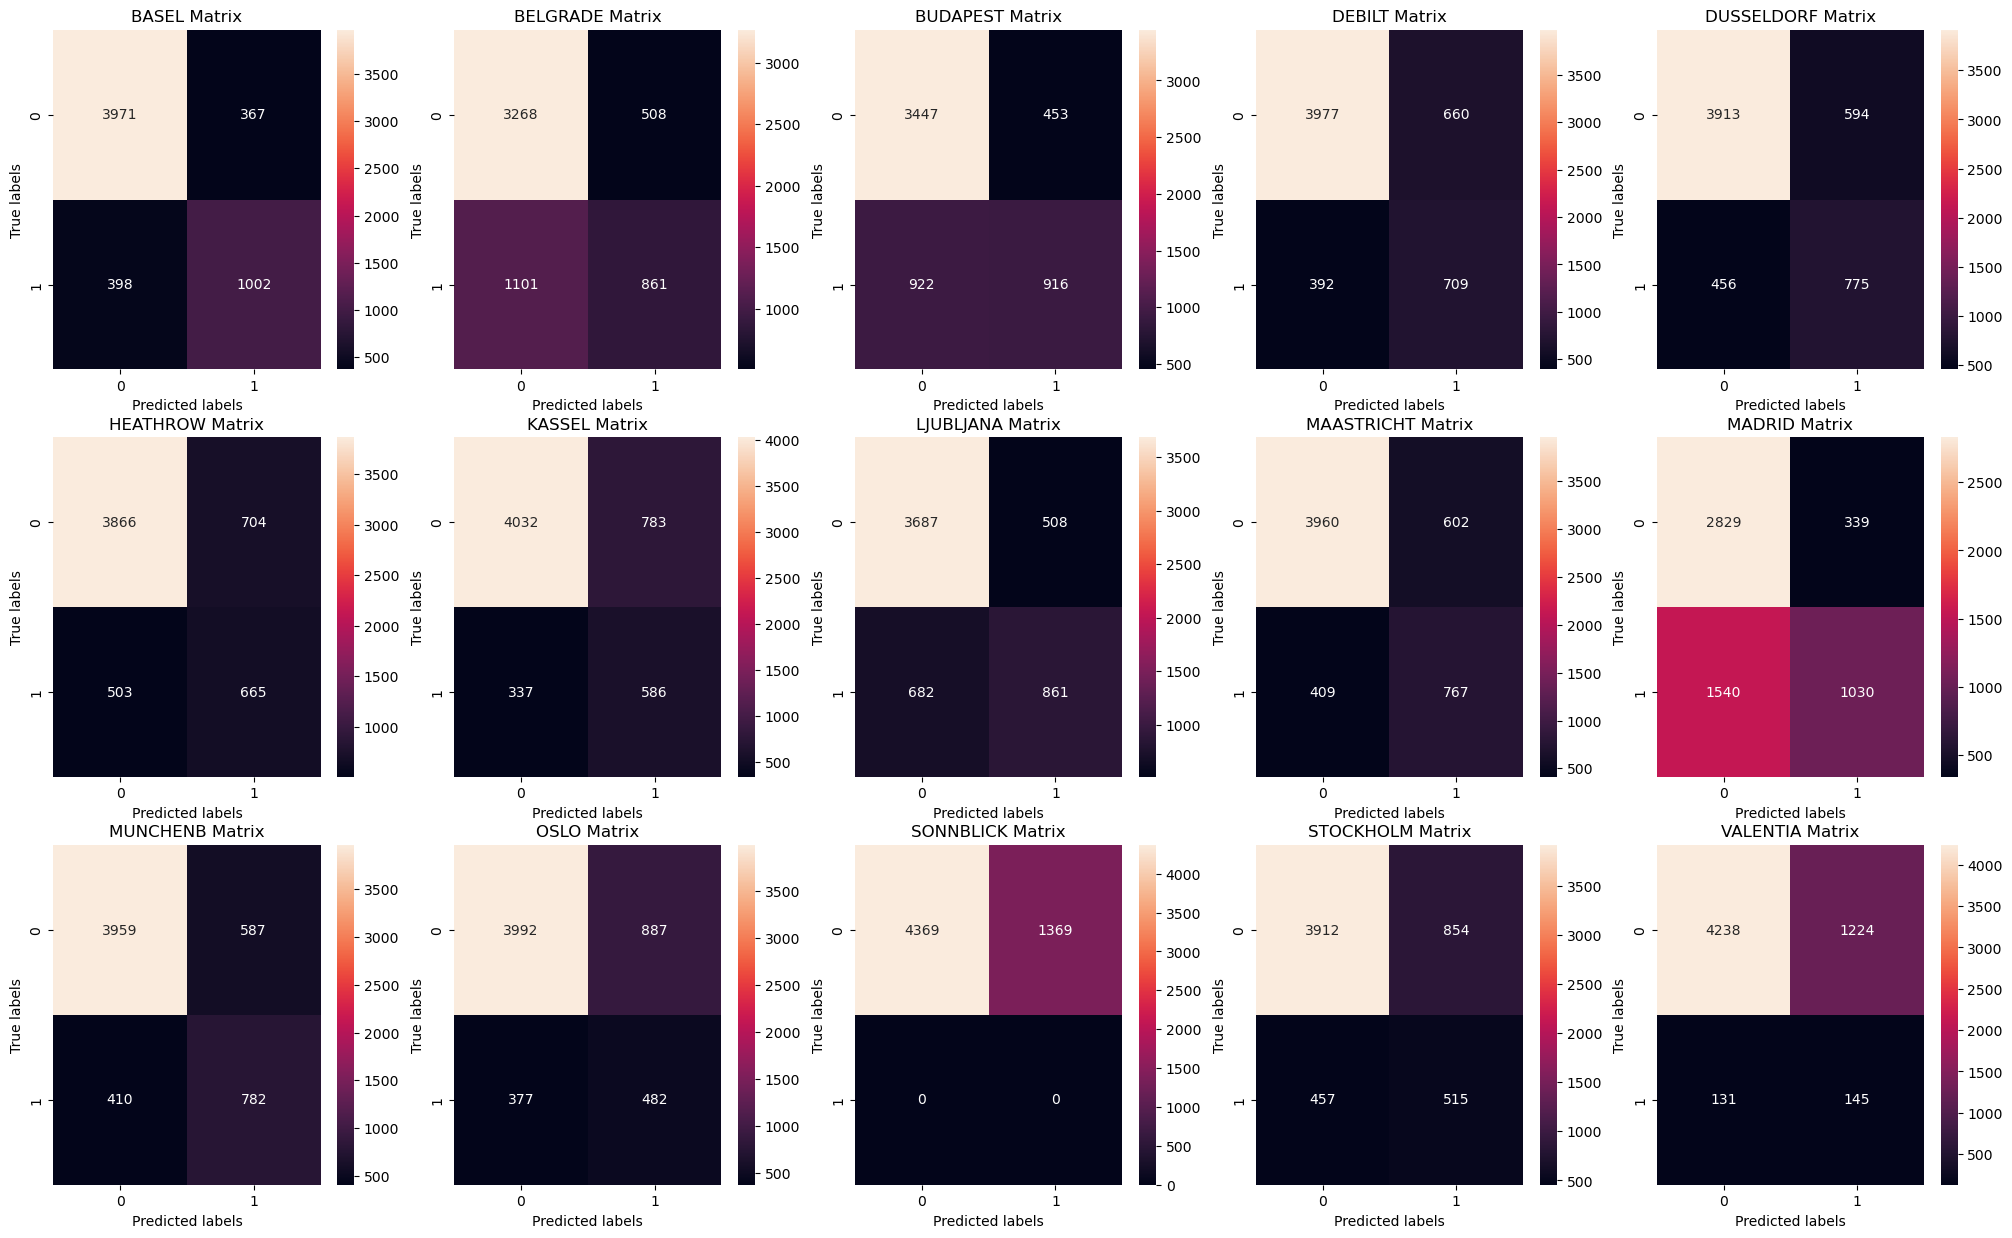

In [76]:
# Creating confusion matrix based on the last "k" in the sequence (Test data)
# Define and train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)  # Ensure X_train and y_train are defined

# Generate predictions
y_pred_test = model.predict(X_test)  # Ensure X_test is defined

# List and sort unique locations
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()

# Ensure `key` is properly defined
key = "_pleasant_weather"

# Initialize subplots
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
labels = ['pleasant', 'unpleasant']
count = 0

# Iterate over the locations
for i in range(3):
    for j in range(5):
        if count >= len(locations):  # Prevent out-of-bounds indexing
            break
        
        name = locations[count]
        
        # Ensure correct indexing for y_test
        if isinstance(y_test, pd.DataFrame):
            true_values = y_test[name + key]
        elif isinstance(y_test, pd.Series):
            true_values = y_test
        else:
            raise ValueError("y_test must be a Pandas DataFrame or Series")
        
        # Ensure correct slicing for y_pred_test
        if len(y_pred_test.shape) == 2:
            pred_values = y_pred_test[:, count]
        elif len(y_pred_test.shape) == 1:
            pred_values = y_pred_test
        else:
            raise ValueError("y_pred_test must be a 1D or 2D array")
        
        # Compute confusion matrix
        cm = confusion_matrix(true_values, pred_values)
        
        # Plot heatmap
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])
        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(f"{name} Matrix")
        
        count += 1


In [78]:
y_test_pred = weather_dt.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_test_pred))
multilabel_confusion_matrix(y_test, y_test_pred)

Test accuracy score:  0.47420704078075987


array([[[3862,  476],
        [ 466,  934]],

       [[3179,  597],
        [ 521, 1441]],

       [[3387,  513],
        [ 483, 1355]],

       [[4296,  341],
        [ 360,  741]],

       [[4116,  391],
        [ 396,  835]],

       [[4078,  492],
        [ 425,  743]],

       [[4485,  330],
        [ 329,  594]],

       [[3672,  523],
        [ 477, 1066]],

       [[4158,  404],
        [ 372,  804]],

       [[2824,  344],
        [ 407, 2163]],

       [[4161,  385],
        [ 379,  813]],

       [[4547,  332],
        [ 323,  536]],

       [[5738,    0],
        [   0,    0]],

       [[4418,  348],
        [ 385,  587]],

       [[5309,  153],
        [ 177,   99]]])

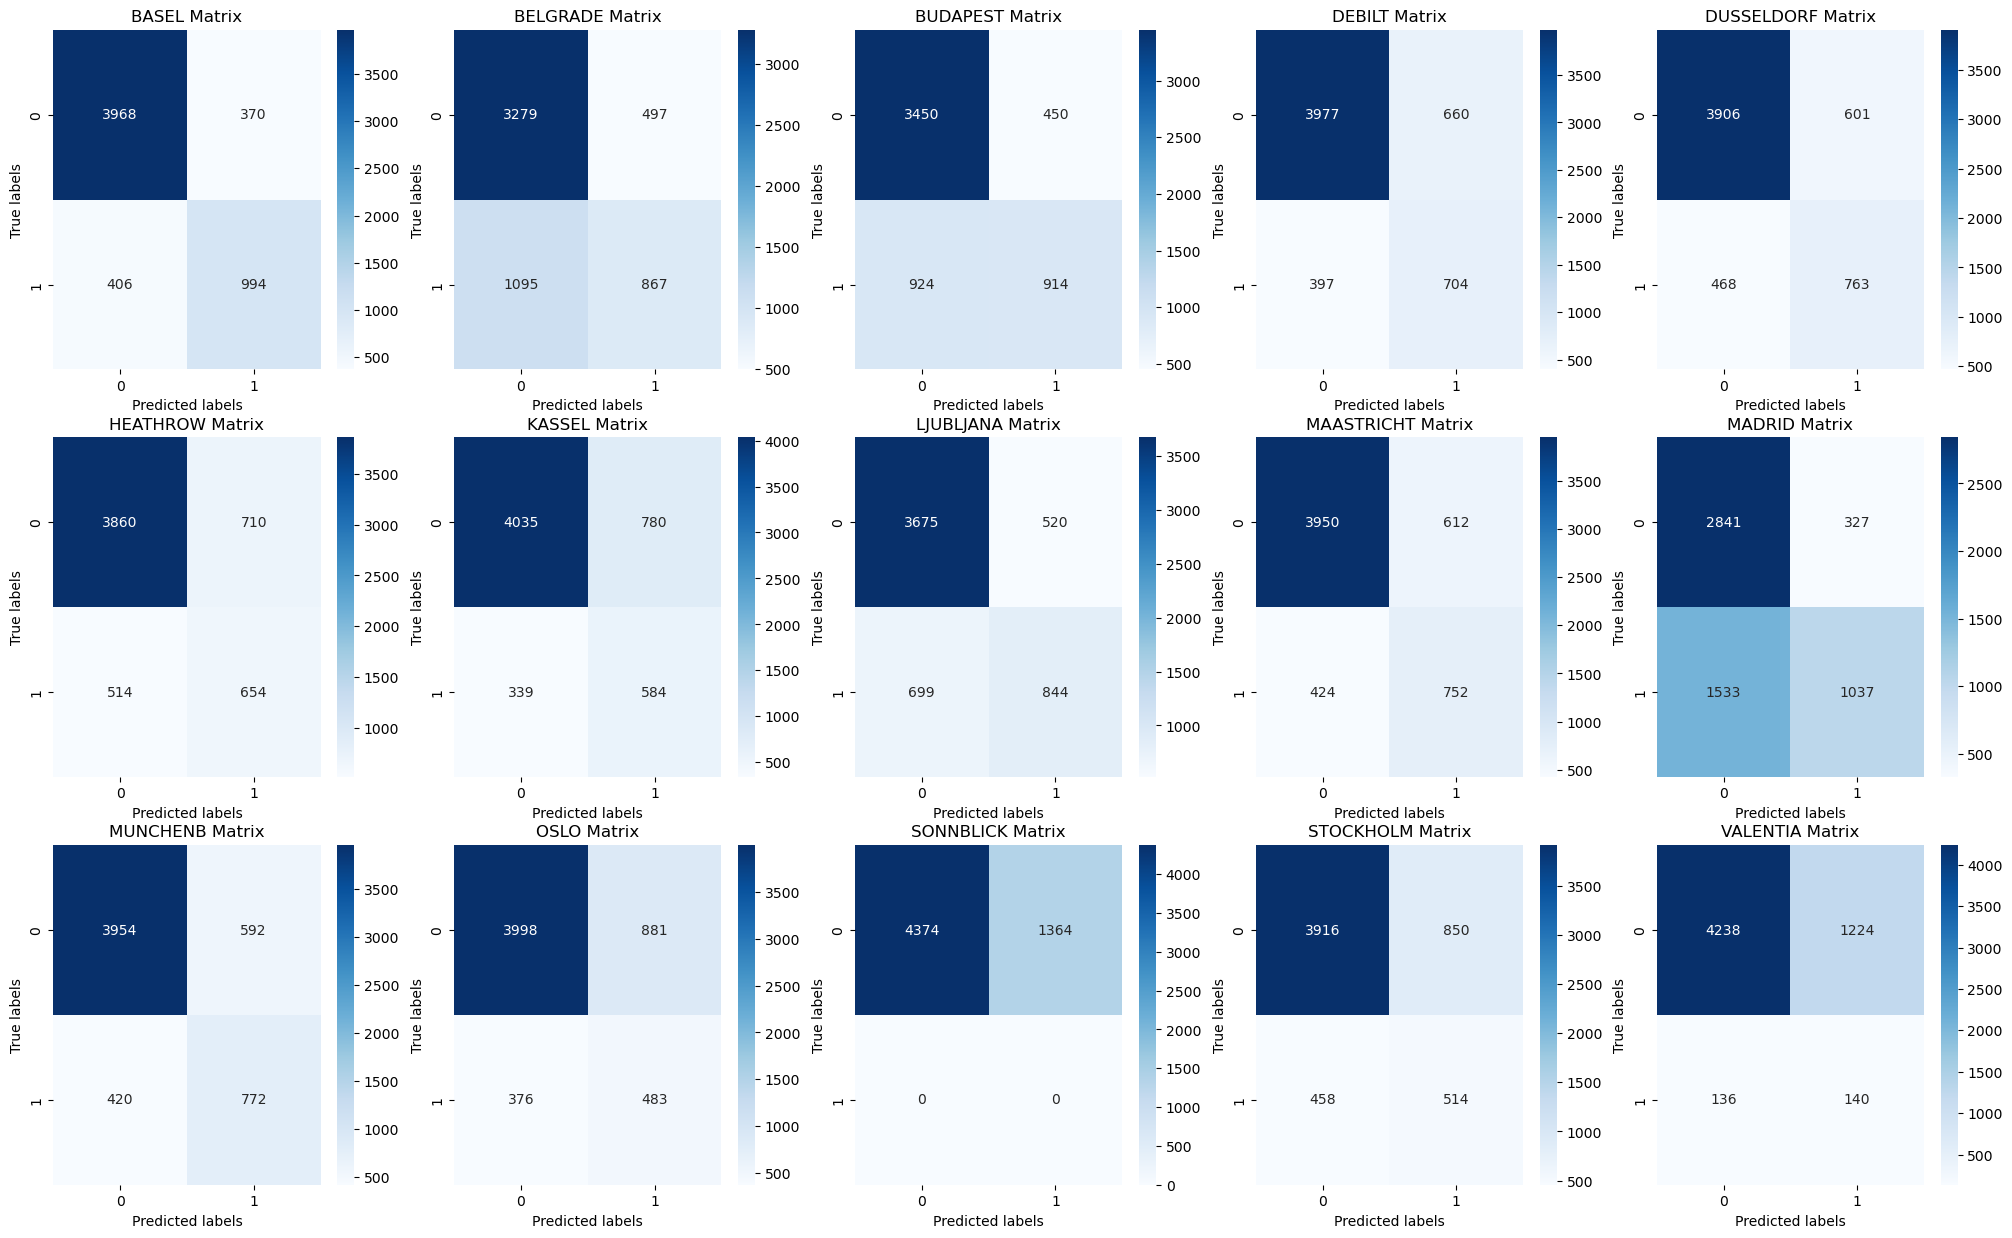

In [82]:
# Step 1: Train the model (ensure model and data are defined)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)  # Ensure X_train and y_train are defined

# Step 2: Generate predictions for test data
y_pred_test = model.predict(X_test)  # Ensure X_test is defined

# Step 3: Prepare locations and key
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()

key = "_pleasant_weather"  # Define key suffix for column names

# Step 4: Initialize subplots
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
labels = ['pleasant', 'unpleasant']
count = 0

# Step 5: Iterate through locations and plot confusion matrices
for i in range(3):
    for j in range(5):
        if count >= len(locations):  # Prevent out-of-bounds indexing
            break
        
        name = locations[count]
        
        # Debugging: Ensure y_test is structured correctly
        if isinstance(y_test, pd.DataFrame):
            if name + key not in y_test.columns:
                print(f"Skipping {name + key}: Not found in y_test.columns")
                count += 1
                continue
            true_values = y_test[name + key]
        elif isinstance(y_test, pd.Series):
            true_values = y_test
        else:
            raise ValueError("y_test must be a Pandas DataFrame or Series")
        
        # Debugging: Ensure y_pred_test is structured correctly
        if len(y_pred_test.shape) == 2:  # Handle 2D predictions
            if count >= y_pred_test.shape[1]:
                print(f"Skipping {name}: Out-of-bounds for y_pred_test")
                count += 1
                continue
            pred_values = y_pred_test[:, count]
        elif len(y_pred_test.shape) == 1:  # Handle 1D predictions
            pred_values = y_pred_test
        else:
            raise ValueError("y_pred_test must be a 1D or 2D array")
        
        # Compute confusion matrix
        cm = confusion_matrix(true_values, pred_values)
        
        # Plot heatmap
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j], cmap='Blues')
        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(f"{name} Matrix")
        
        count += 1
